## Customer Segmentation

In [90]:
import pandas as pd
import numpy as np
from IPython.display import display

Dataset Link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [91]:

df = pd.read_csv("/content/customers.csv")
print("Wholesale customers dataset has {} samples with {} features each.".format(*df.shape))

Wholesale customers dataset has 440 samples with 8 features each.


In [92]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
df['Channel'][338]

1

In [94]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df.shape

(440, 6)

In [95]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [96]:
df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

# Lets explore few sample

In order to understand better our dataset and how the data will be transformed through the analysis, we will select a few sample points and explore them in detail.

In [97]:
indices = [150,200,400]

In [98]:
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices],columns = df.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16225,1825,1765,853,170,1067
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. We make a prediction on what kind of establishment (customer) could each of the three samples we've chosen represent?



The mean values are as follows:


*   Fresh: 12000.2977
*   Milk: 5796.2
*   Grocery: 7951
*   Frozen : 3071
*   Detergents_paper: 2881.4
*   Delicatessen: 1524.8

Knowing this, how do our samples compare?

1) Index 150: 

- Largest spending on Fresh product of entire dataset. Likely to be a large market
- Lower than average spending on Frozen and Detergents_paper.

2)Index 200 :
- Largest spending on Milk, detergents and paper and groceries of the entire dataset, which usually are products for houses.

3)Index 400 :
 - The spending on milk, groceries and detergent and papers is in the bottom quartile.

- It may be small and cheap resturent which needs groceries and frozn food to serve the berakfast or meals.

Now, we will analyze the relevence of the features for understanding the purchasing behaviours of the customers. 

In other words, to determine if a customer that purchase some amount of one category of products will necessary purchase some proportional amount of another catgory of products

We will study this by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [99]:
df.head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


In [100]:
new_df = df.drop("Grocery",axis=1)

Split the data into training and testing sets(0.30) using the given feature as a target

In [101]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(new_df,df.Grocery,test_size = 0.25,random_state =42)

Create a decision tree regressor and fit it to the training set

In [102]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test)

In [103]:
from sklearn.metrics import r2_score
score = r2_score(y_test,prediction)
print("prediction score is : {}".format(score))

prediction score is : 0.6935767157260946


In [104]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr = regr.fit(X_train,y_train)
pred = regressor.predict(X_test)

In [105]:
from sklearn.metrics import r2_score
scor = r2_score(y_test,pred)
print("prediction score is : {}".format(scor))

prediction score is : 0.6935767157260946


- We tried to pfedict the Grocery feature.

- The reported prediction score was 68.04%.

- As we obtained a high score, it as indicator of a very good fit. So this feature is easy to predict considering the rest of spendign habits and, therefore, not very necessary for identifying customers’ spending habits.

# Visualising Feature Distribution
In order to understand better our dataset, we will display a scatter matrix of every product feature.

The product features that show a correlation in the scatter matrix will be relevant to predict others.


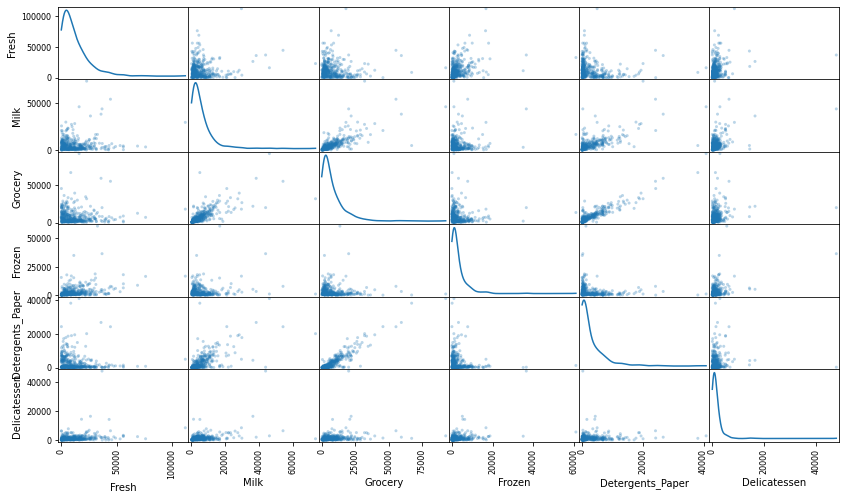

In [106]:
# Produce a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df,alpha = 0.3,figsize=(14,8),diagonal="kde");

Display Correlation matrix

In [107]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Using scatter matrix and the correlation as a refrences, we can infer the following :

- Data is not normally distributed, it is positively shewed and it is resemble the log-normal distribution.

- In most plots, most data points lie near the origin which shows little correlation between them.

- From the scatter plots and correlation matrix, we can see that there is a strong correlation between the "Grocery" and "Detergent_paper" fatures. The features "Grocery" and "Milk" also show a good degree of correlation.

- This correlation confirms my guess about the relevance of the "Grocery" fature, which can be accurately predicted with the "Detergent_paper" feature. 

## Data Preprocessing

Featur Scaling

In [108]:
# Scale the datausing the natural algorithm
log_df = np.log(df)

In [109]:
# Scale the sampl data using the natural algorithm
log_samples = np.log(samples)

In [110]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.694309,7.509335,7.475906,6.74876,5.135798,6.972606
1,8.028455,9.490998,10.048756,8.27919,9.206232,6.594413
2,8.399760,6.809039,7.121252,8.18200,5.030438,6.921658


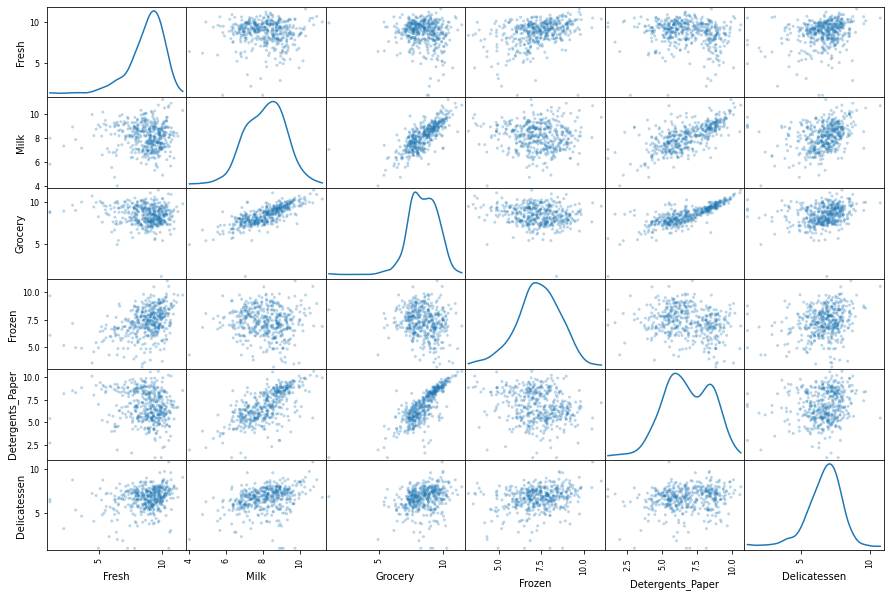

In [111]:
# Plotting a sactter matrix for each pair of newly scaled features
pd.plotting.scatter_matrix(log_df,alpha=0.3,figsize=(15,10),diagonal="kde");

In [112]:
log_df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal.

Outlier Detection

An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [113]:
outliers = []

# for each feature find th data points with extreme high or low values
for feature in log_df.keys():

  # Calculate Q1 (25th percentile of the data) for the given feature
  Q1 = np.percentile(log_df[feature],25)
   
   # Calculate Q3 (75th prcentile of the data) for the given feature
  Q3 = np.percentile(log_df[feature],75)

  # Use the interquartile range to calculate an outlier step (1.5 times the interquartilerange)
  step = 1.5 *(Q3 - Q1)

  # Display the outliers
  print("Data points considered outliers for the feature '{}':".format(feature))
  display(log_df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))])
  lista = log_df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))].index.tolist()
  outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [114]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [115]:
 # detecting outliers that appear is more than one product
seen = {}
dupes = []

for lista in outliers:
  for index in lista:
    if index not in seen:
      seen[index] = 1
    else:
      if seen[index] ==1:
        dupes.append(index)
        seen[index] +=1
dups = sorted(dupes)
dupes          


[154, 65, 75, 66, 128]

Removing outliers

In [116]:
df_good = log_df.drop(dupes,axis=0).reset_index(drop=True)

In [117]:
df_good.shape

(435, 6)

- Datapoints considred outliers that are present in more than one feature are : 154,65,75,66,128.

- K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated. Because of this, the outliers shoul be removed.

## Feature Transformation

Principal Component Analysis


Now we will use Principal Component Analysis (PCA) to extract conclusions about the hidden structure of the dataset. PCA is used to calculate those dimensions that maximize variance, so we will find the combination of features that describe best each customer.

Once the data has been scaled to a normal distribution and the necessary outliers have been removed, we can apply PCA to the df_good to discover which dimensions about the data best maximize the variance of features involved.

In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone.

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import sys
sys.path.append("/content/visuals.py")  # https://drive.google.com/file/d/1NZXwkbvuiWHM3Br2ku9viMMsuPJhYDew/view?usp=sharing

In [120]:
import visuals as vs

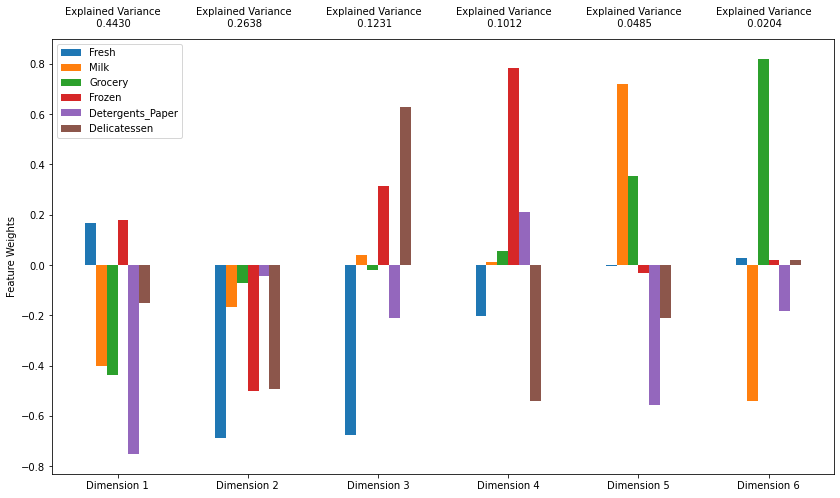

In [121]:
# Apply PCA by fitting the good data with the same number of dimensions as features
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=df_good.shape[1])
pca = pca.fit(df_good)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(df_good, pca)

The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

https://ro-che.info/articles/2017-12-11-pca-explained-variance

- The variance explained by the first two Principal Components is the 70.68% of the total.

- The variance explained by the first four Principal Component is the 93.11% of the total.

##Dimension discussion

- Dimension 1: This dimension represents well, in terms of negative variance, the following features: Detergent_Paper, Milk and groceries. Mostly utilities for everyday consuming.

- Dimension 2: This dimension represents well, in terms of negative variance, the following features: Fresh, Frozen and Delicatessen. Mostly food consuming.

- Dimension 3: This dimension represents well, in terms of positive variance, the Delicatessen features, and in terms of negative variance de Fresh feature. Food to be consumed on the day.

- Dimension 4: This dimension represents well, in terms of positive variance, the Frozen feature, and in terms of negative variance, the Delicatessen Feature. Food that can be storaged.


In [122]:
# Display sample log-data after having a PCA transformation applied

display(pd.DataFrame(np.round(pca_samples,4),columns =pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9406,-0.2418,-0.2884,-1.2041,0.0917,-0.1492
1,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
2,2.5025,0.1006,1.0091,0.1630,-0.5126,-0.0520


In [123]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(df_good)
reduced_data = pca.transform(df_good)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data,columns = ['Dimension 1',"Dimension 2"])

In [124]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


In [125]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4),
                     columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,1.9406,-0.2418
1,-2.9903,-0.3645
2,2.5025,0.1006


##Visualizing a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2).

The biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

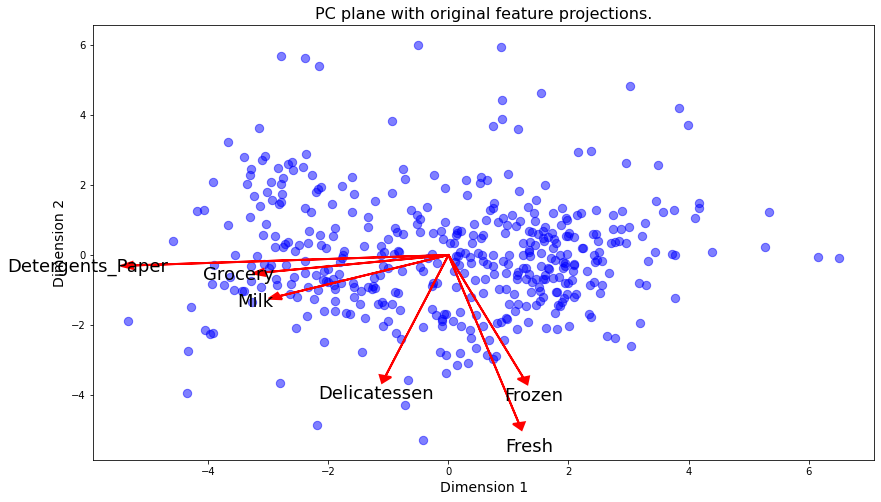

In [126]:
vs.biplot(df_good,reduced_data,pca)

A point the lower right corner of the figure will likely correspond to a customer that spends a lot on 'Milk', 'Grocery'and 'Detergents_Paper', but not so much on the other product categories.

##Clustering

Creating Clusters

In [127]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
  print("Number of clusters:" + str(i))

  # Applying your clustering algorithm of choice to the reduced data
  cluster = GaussianMixture(random_state=42,n_components=i)
  cluster.fit(reduced_data)

  # Predict the cluster of each data point
  preds = cluster.predict(reduced_data)

  # Find the cluster centers
  centers = cluster.means_
  print("Cluster Center: " + str(centers))

  # Prdict th cluster for each transformed sample data point

  sample_preds = cluster.predict(pca_samples)
  print("sample prediction: " + str(sample_preds))

  #Calculate the mean silhoute coefficient for the number of cluster choosen

  score = silhouette_score(reduced_data,preds)
  scores[i] = score
  print("Silhoutee score is: " + str(score), "\n")

print("Score: " + str(scores))  




Number of clusters:2
Cluster Center: [[ 1.25648563 -0.17661209]
 [-2.2256852   0.31284314]]
sample prediction: [0 1 0]
Silhoutee score is: 0.4223246826459388 

Number of clusters:3
Cluster Center: [[-2.12747031 -0.00345018]
 [-1.47131107  0.9302386 ]
 [ 1.33240836 -0.24325007]]
sample prediction: [2 0 2]
Silhoutee score is: 0.38524471937146926 

Number of clusters:4
Cluster Center: [[-1.62987178 -0.67042181]
 [-2.64869823  1.21463156]
 [ 1.33390526 -0.34578183]
 [ 1.60494287  1.4780565 ]]
sample prediction: [2 0 2]
Silhoutee score is: 0.3458671375116742 

Number of clusters:5
Cluster Center: [[ 0.3334473  -1.85876158]
 [-2.84695947  1.50466681]
 [ 1.57656601 -0.0981946 ]
 [ 2.22802118  2.64221015]
 [-1.64820678 -0.37300795]]
sample prediction: [2 4 2]
Silhoutee score is: 0.3314244539434991 

Number of clusters:6
Cluster Center: [[ 0.58724264 -1.84283598]
 [-2.83698866  1.750979  ]
 [ 1.46372735 -0.14070095]
 [ 2.67567304  0.71178899]
 [-1.64502773 -0.44638497]
 [ 1.15438443  4.07108358

The number of clusters with the best silhoutee score is 2 with a 0.42 score

##Cluster Visualisation

In [128]:
# Apply clustering algorithm of choice to the reducd data

cluster = GaussianMixture(random_state=42,n_components=2)
cluster.fit(reduced_data)

# Predict the cluster for each data point
prds = cluster.predict(reduced_data)

#Find the cluster centers
centers = cluster.means_
print('Cluster Center: ' + str(centers))

Cluster Center: [[ 1.25648563 -0.17661209]
 [-2.2256852   0.31284314]]


In [129]:
# Predict the cluster for each transformed sample data point
sample_preds = cluster.predict(pca_samples)
print('Sample Prdiction :' + str(sample_preds))

Sample Prdiction :[0 1 0]


In [130]:
# Calculate the mean silhoutee coefficient for the number of clusters chosen

score = silhouette_score(reduced_data,prds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Silhouette score is: 0.4223246826459388 



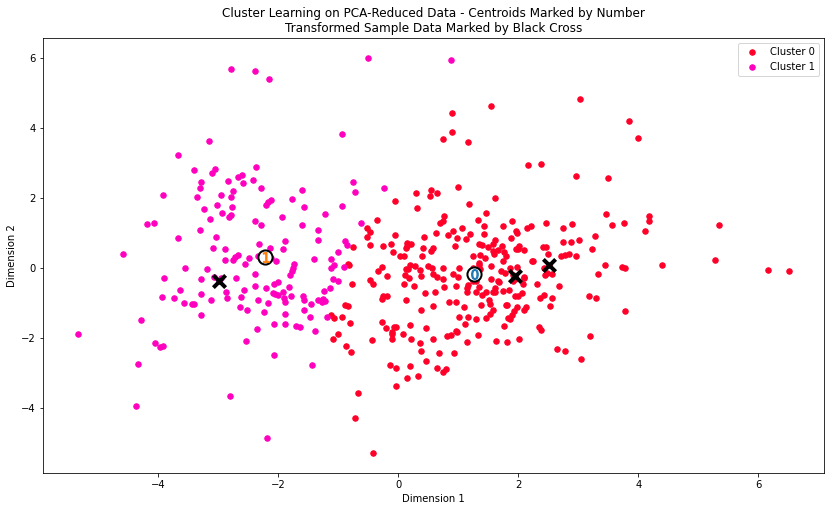

In [131]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, prds, centers, pca_samples)

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters.


For the problem of creating customer segments, a cluster’s center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.


In [132]:
# Inverse transform from the centers
log_centers = pca.inverse_transform(centers)

# Exponential the centers
true_centers = np.exp(log_centers)

In [133]:
# Display the true centers

segments = ["Segment {}".format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers),columns=df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


- Segment 0 may represent a a fresh food market as every feature except Frozen and Fresh are below the median.

- Segment 1 may represent a supermarket as every feature except fresh and frozen are above the median.

In [134]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [135]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16225,1825,1765,853,170,1067
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


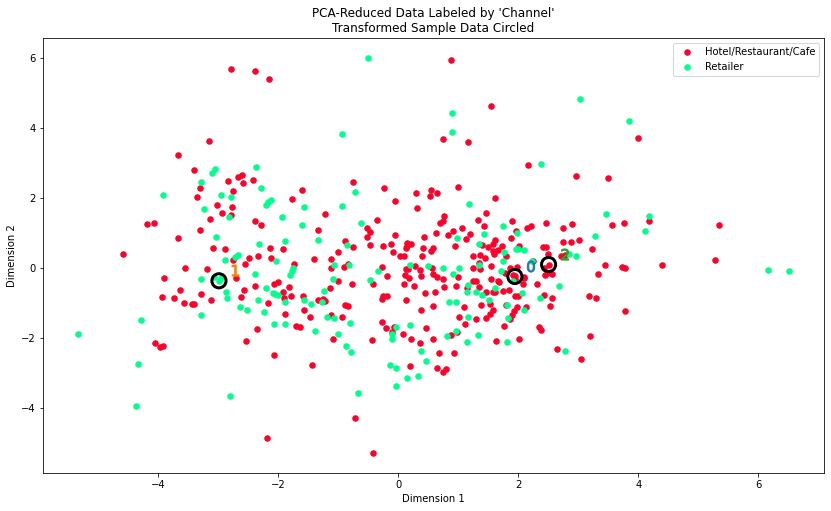

In [136]:
# Display the clustering results based on 'Channel' data 
vs.channel_results(reduced_data, prds, pca_samples)

We can observe that the cluster algorithm does a pretty good job of clustering the data to the underlying distribution as the cluster 0 and 2 can be associated perfectly with a Ho/Re/Ca and the cluster 1 to the retailer. This result is same as the above sample output result
